### INTRODUCTION

This Dataset gives us a clear understanding of how fund are being used to support women's welfare programs accros different states in india. This Dataset focuses from the years 2020,2021,2022,2023 and give details of the money sanctioned for schemes such as legal awareness campaigns, research studies, and workshops on women’s rights and safety.Some states have received funding for multiple programs, as seen in the serial number breakdown (e.g., 1.i, 1.ii for Andhra Pradesh).the total amount allocated is currently stored as test that need to be converted into numbers for proper analysis.There are differences in funding between states that are observable, and they would presumably be a function of local needs and policy.The initiatives primarily center on disseminating legal awareness, preventing cyber crimes, and addressing gender-based violence. Examining further into fund allocation by state and program would identify which states are receiving additional support and where they may need additional focus. If other year data were accessible, we would be able to see how funds have shifted throughout the years and what effect they have had. In total, this dataset is an essential resource for learning about government expenditures on women's welfare, making policy assessments, and assessing avenues for optimization.

**DataSet :** https://www.data.gov.in/resource/year-wise-details-fund-allocation-state-women-commissions-various-programmesactivities

**SOURCE :** https://www.data.gov.in/

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [97]:
import pandas as pd
df=pd.read_csv("Fund_Allocation_cleaned.csv")
df

,Sl. No.,Year,State Women Commission,Name of the Program,Total Funds Sanctioned
0,1.1,2020-21,Andhra Pradesh,Legal Awareness Programme,295000
1,1.2,2020-21,Andhra Pradesh,Webinar- Trafficking of women and children,40000
2,2.0,2020-21,Arunachal Pradesh,Closeted Conversation themed Men for Women,100000
3,3.1,2020-21,Chhattisgarh,Workshop on Laws relating to women,255000
4,3.2,2020-21,Chhattisgarh,Research study- Crime against women in cyber w...,500000
...,...,...,...,...,...
168,11.2,2023-24,Tamil Nadu,Poshan Maah,250000
169,12.1,2023-24,Telangana,Programs under Azadi ka Amrit Mahotsav,120000
170,12.2,2023-24,Telangana,Poshan Maah,50000
171,13.0,2023-24,Tripura,Poshan Maah,200000


It reads the Fund Allocation dataset

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No.                 173 non-null    float64
 1   Year                    173 non-null    object 
 2   State Women Commission  173 non-null    object 
 3   Name of the Program     173 non-null    object 
 4   Total Funds Sanctioned  173 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.9+ KB


It reads the Fund Allocation dataset

**Column Description**

Sl. No. – Serial number for reference.
<br>
Year – The starting year of the financial period (extracted from "YYYY-YY" format).
<br>
State Women Commission – The state for which the funds were allocated.
<br>
Name of the Program – The specific women welfare program receiving funds.
</br>
Total Funds Sanctioned – The amount of funds sanctioned for the program.

In [103]:
df.rename(columns={'Sl. No.': 's.no'}, inplace=True)

It Renames the "Sl. No." column to "s.no" in the DataFrame.

In [106]:
df["Total Funds Sanctioned"] = pd.to_numeric(df["Total Funds Sanctioned"], errors="coerce").astype("Int64")

 It converts "Total Funds Sanctioned" columns to numeric,handling errors, and ensures it remains an integer type

In [109]:
df["Year"] = df["Year"].str.split("-").str[0].astype(int)

This code extracts the starting year from the Year column (formatted as "YYYY-YY") and converts it into an integer.

In [112]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

It converts "Year" columns to numeric,handling errors, and ensures it remains an integer type

In [115]:
df = df.dropna(subset=["Total Funds Sanctioned"])

It Removes rows where the "Total Funds Sanctioned" column has missing values.

In [118]:
print(df.dtypes) 

s.no                      float64
Year                        Int64
State Women Commission     object
Name of the Program        object
Total Funds Sanctioned      Int64
dtype: object


It shows the datatypes of all columns

In [121]:
df.isnull().sum()

s.no                      0
Year                      0
State Women Commission    0
Name of the Program       0
Total Funds Sanctioned    0
dtype: int64

Counts the number of missing values in each column of the DataFrame.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   s.no                    172 non-null    float64
 1   Year                    172 non-null    Int64  
 2   State Women Commission  172 non-null    object 
 3   Name of the Program     172 non-null    object 
 4   Total Funds Sanctioned  172 non-null    Int64  
dtypes: Int64(2), float64(1), object(2)
memory usage: 8.4+ KB


It reads the fund allocation dataset after cleaning

In [144]:
df

,s.no,Year,State Women Commission,Name of the Program,Total Funds Sanctioned
0,1.1,2020,Andhra Pradesh,Legal Awareness Programme,295000
1,1.2,2020,Andhra Pradesh,Webinar- Trafficking of women and children,40000
2,2.0,2020,Arunachal Pradesh,Closeted Conversation themed Men for Women,100000
3,3.1,2020,Chhattisgarh,Workshop on Laws relating to women,255000
4,3.2,2020,Chhattisgarh,Research study- Crime against women in cyber w...,500000
...,...,...,...,...,...
168,11.2,2023,Tamil Nadu,Poshan Maah,250000
169,12.1,2023,Telangana,Programs under Azadi ka Amrit Mahotsav,120000
170,12.2,2023,Telangana,Poshan Maah,50000
171,13.0,2023,Tripura,Poshan Maah,200000


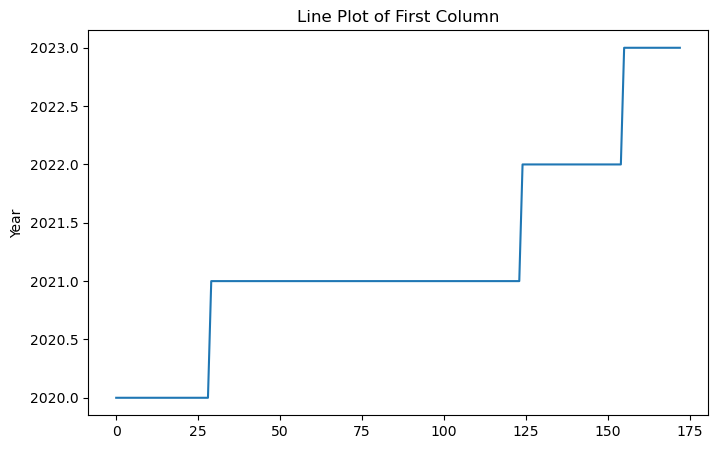

In [131]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df.index, y=df.iloc[:, 1])  
plt.title("Line Plot of First Column")
plt.show()

Plots a line graph of the first column against the DataFrame index

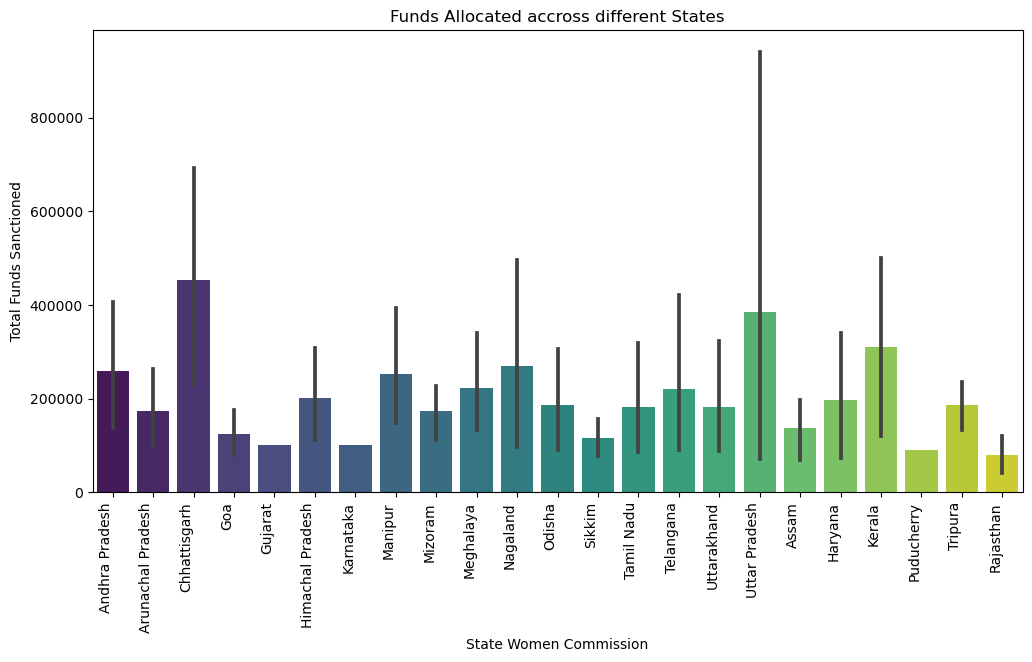

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(x="State Women Commission", y="Total Funds Sanctioned", data=df, palette="viridis")
plt.xticks(rotation=90, ha='right')
plt.xlabel("State Women Commission")
plt.ylabel("Total Funds Sanctioned")
plt.title("Funds Allocated accross different States")
plt.show()

Creates a bar chart showing total funds sanctioned for each State Women Commission.

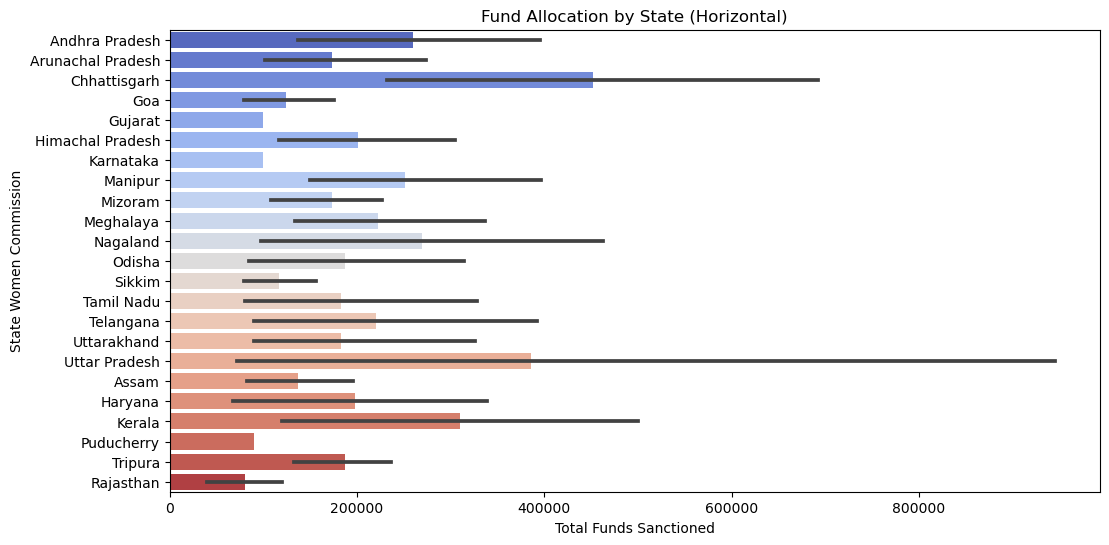

In [148]:
plt.figure(figsize=(12, 6))
sns.barplot(y="State Women Commission", x="Total Funds Sanctioned", data=df, palette="coolwarm")
plt.xlabel("Total Funds Sanctioned")
plt.ylabel("State Women Commission")
plt.title("Fund Allocation by State (Horizontal)")
plt.show()

Creates a horizontal bar chart of total funds sanctioned for each State Women Commission.

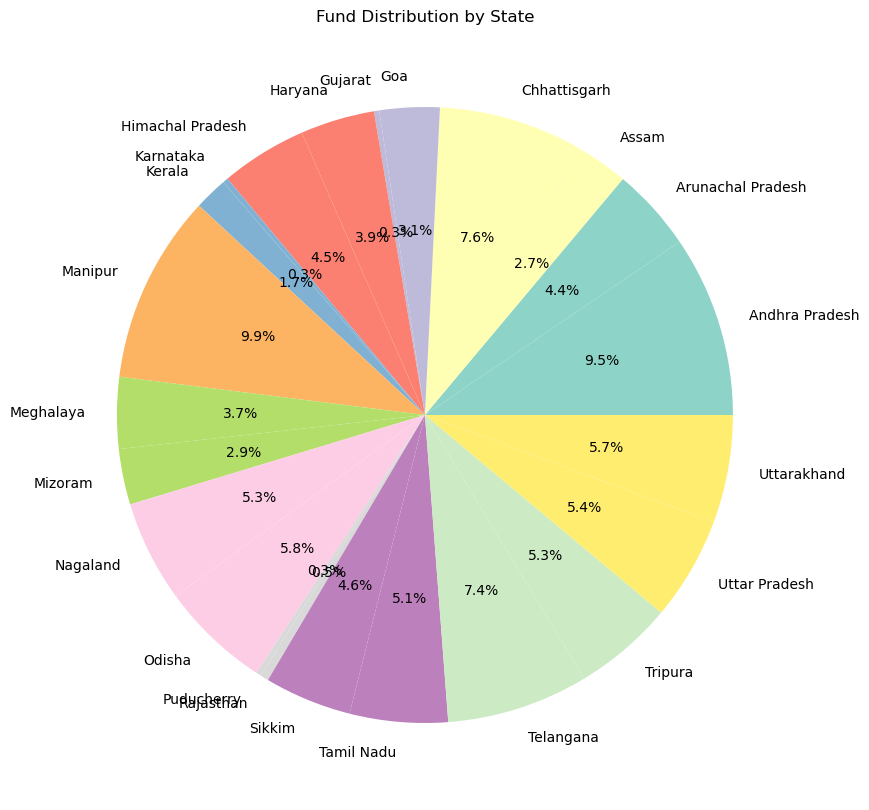

In [151]:
df.groupby("State Women Commission")["Total Funds Sanctioned"].sum().plot.pie(autopct="%1.1f%%", figsize=(10, 10), cmap="Set3")
plt.title("Fund Distribution by State")
plt.ylabel("") 
plt.show()


Creates a pie chart showing the percentage distribution of total funds sanctioned by each State Women Commission.

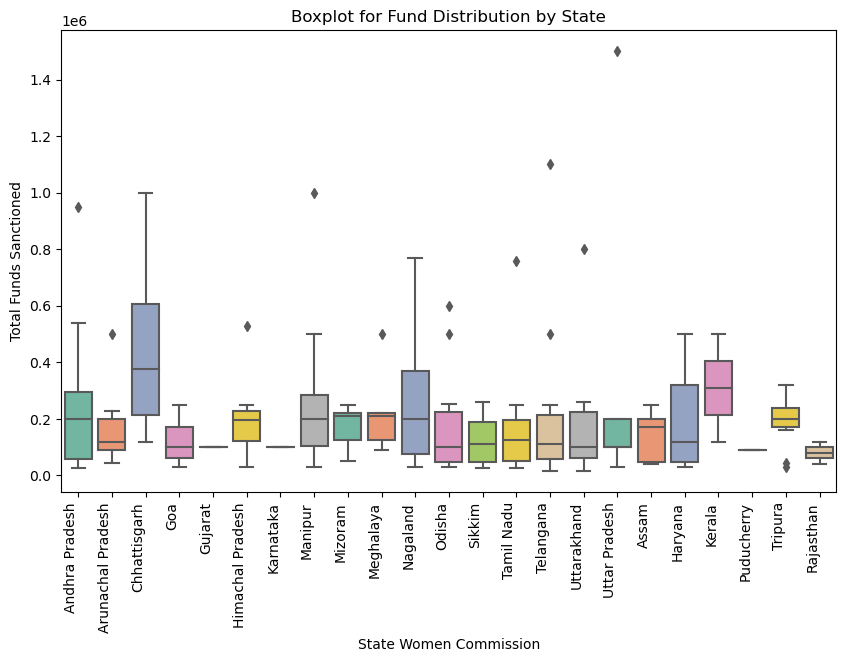

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="State Women Commission", y="Total Funds Sanctioned", data=df, palette="Set2")
plt.xticks(rotation=90, ha='right')
plt.title("Boxplot for Fund Distribution by State")
plt.show()

Creates a box plot to show the distribution of total funds sanctioned for each State Women Commission.

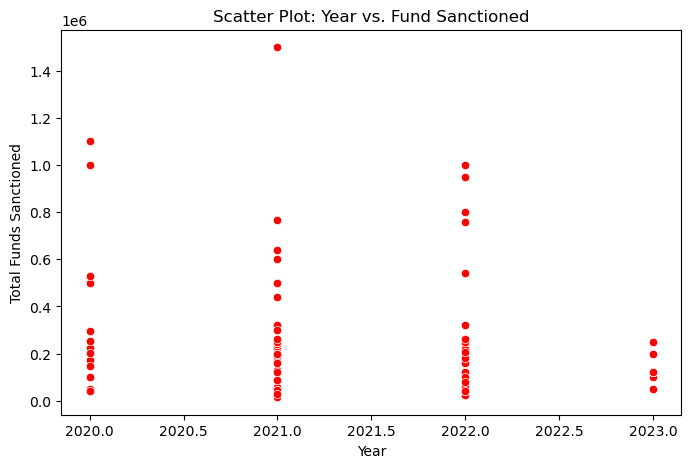

In [157]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Year"], y=df["Total Funds Sanctioned"], color="red")
plt.xlabel("Year")
plt.ylabel("Total Funds Sanctioned")
plt.title("Scatter Plot: Year vs. Fund Sanctioned")
plt.show()

Creates a scatter plot showing the relationship between Year and Total Funds Sanctioned.

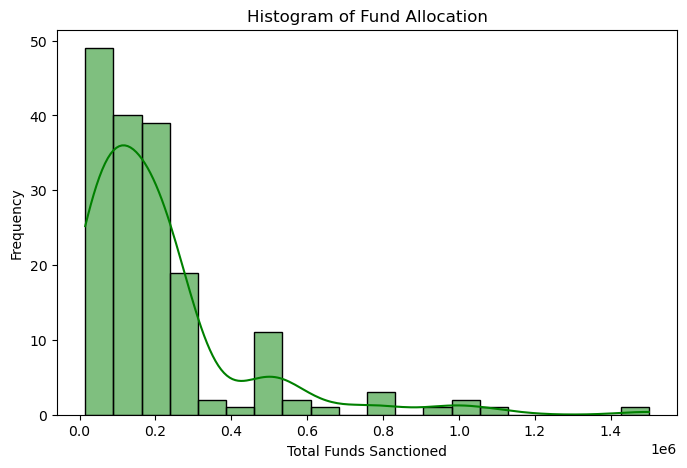

In [160]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Funds Sanctioned"], bins=20, kde=True, color="green")
plt.xlabel("Total Funds Sanctioned")
plt.ylabel("Frequency")
plt.title("Histogram of Fund Allocation")
plt.show()

Creates a histogram with a density curve to show the distribution of total funds sanctioned.

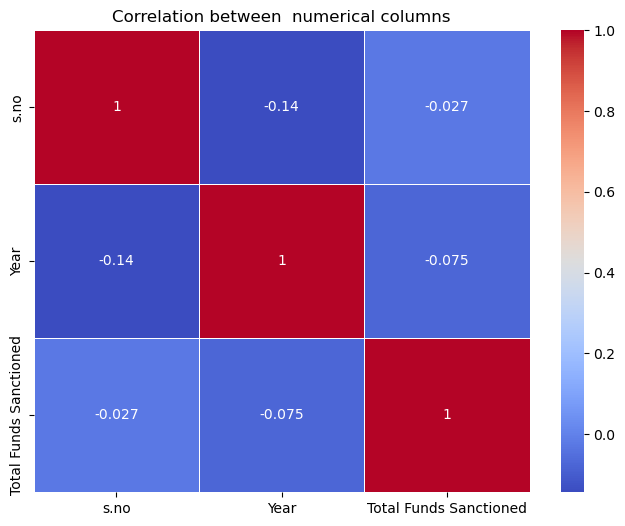

In [165]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between  numerical columns")
plt.show()

Generates a heatmap showing correlations between numerical columns in the dataset.

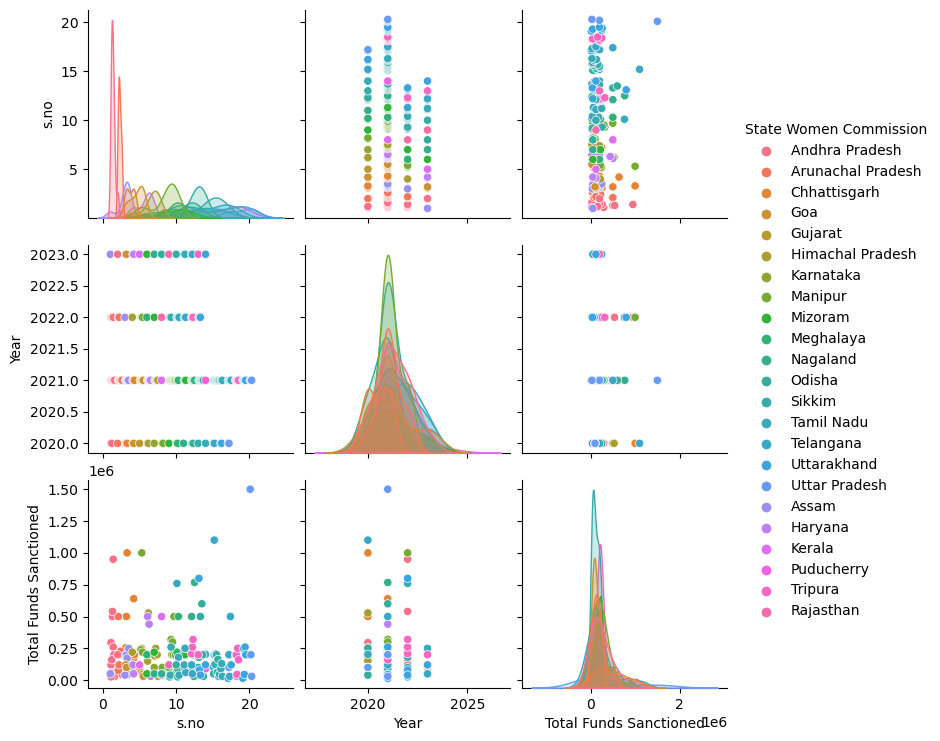

In [168]:
sns.pairplot(df, hue="State Women Commission")
plt.show()

Creates pairwise scatter plots of numerical columns, colored by State Women Commission.

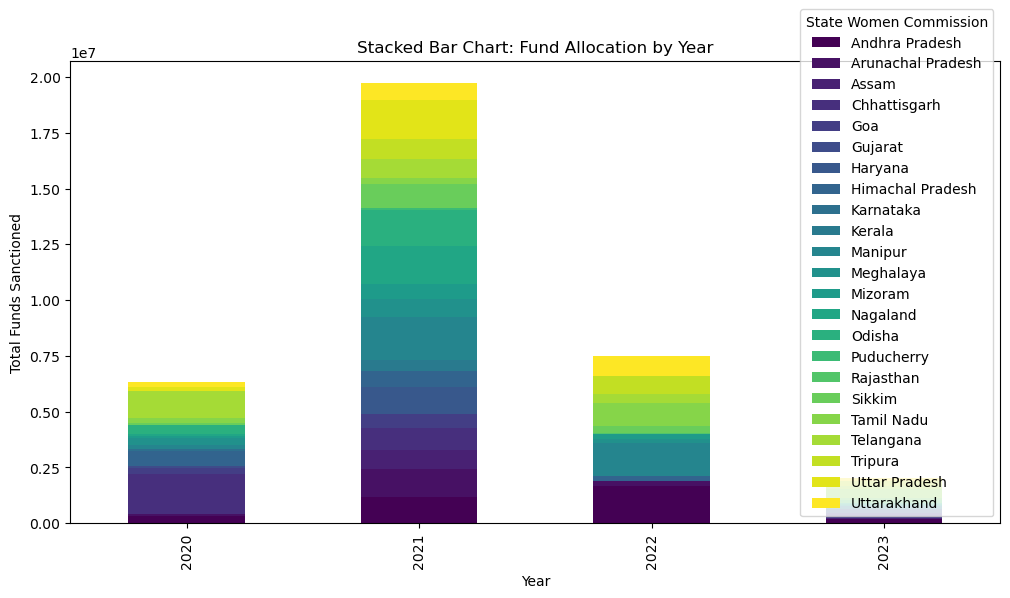

In [171]:
df_pivot = df.pivot_table(index="Year", columns="State Women Commission", values="Total Funds Sanctioned", aggfunc="sum")
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Stacked Bar Chart: Fund Allocation by Year")
plt.ylabel("Total Funds Sanctioned")
plt.show()

Creates a stacked bar chart showing total funds sanctioned by each State Women Commission over the years.

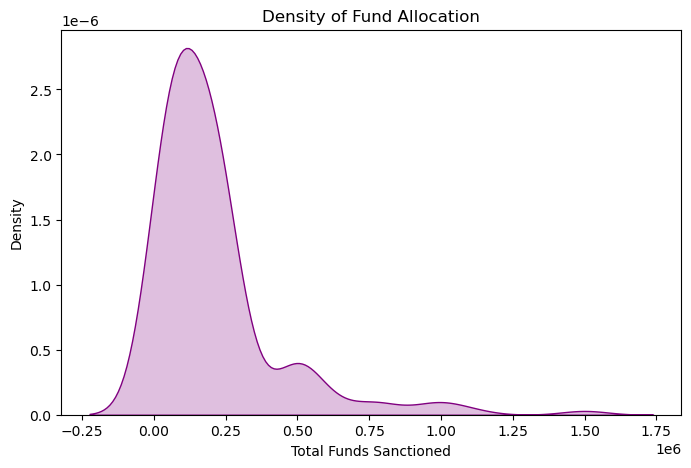

In [176]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Total Funds Sanctioned"], fill=True, color="purple")
plt.xlabel("Total Funds Sanctioned")
plt.ylabel("Density")
plt.title("Density of Fund Allocation")
plt.show()

Creates a KDE plot to show the density distribution of total funds sanctioned.

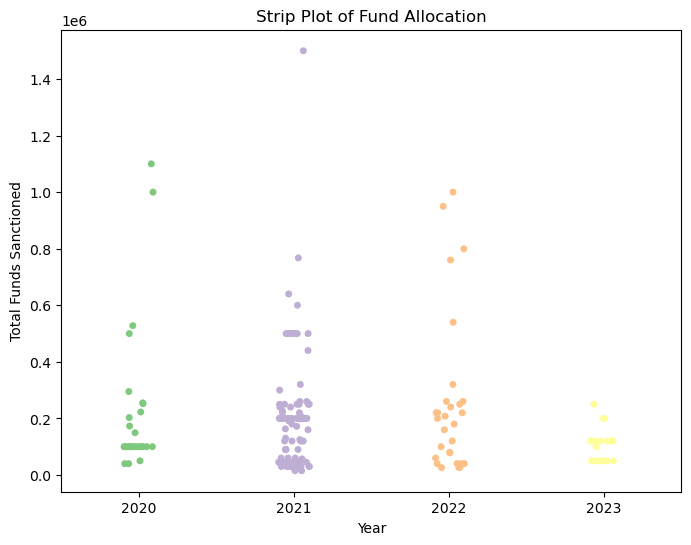

In [179]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="Year", y="Total Funds Sanctioned", data=df, jitter=True, palette="Accent")
plt.xlabel("Year")
plt.ylabel("Total Funds Sanctioned")
plt.title("Strip Plot of Fund Allocation")
plt.show()

Creates a strip plot showing the distribution of total funds sanctioned across different years with jitter for better visibility.

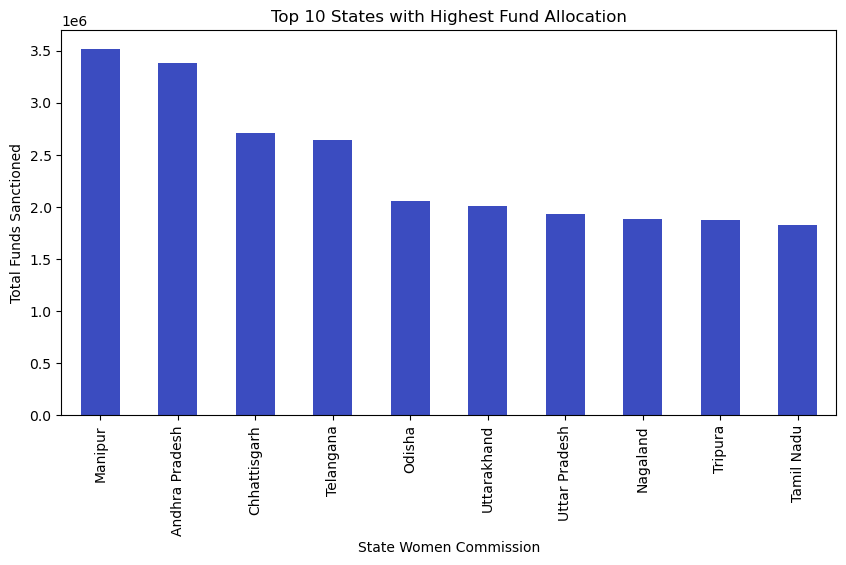

In [182]:
top_states = df.groupby("State Women Commission")["Total Funds Sanctioned"].sum().nlargest(10)
top_states.plot(kind="bar", colormap="coolwarm", figsize=(10, 5))
plt.ylabel("Total Funds Sanctioned")
plt.title("Top 10 States with Highest Fund Allocation")
plt.show()

Creates a bar chart of the top 10 states with the highest total funds sanctioned.

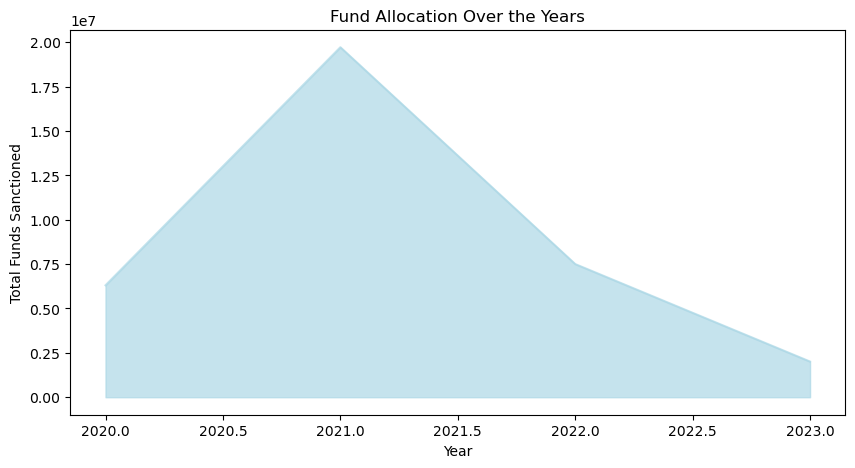

In [185]:
df.groupby("Year")["Total Funds Sanctioned"].sum().plot(kind="area", figsize=(10, 5), color="lightblue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Total Funds Sanctioned")
plt.title("Fund Allocation Over the Years")
plt.show()

Creates an area chart showing the total funds sanctioned over the years.

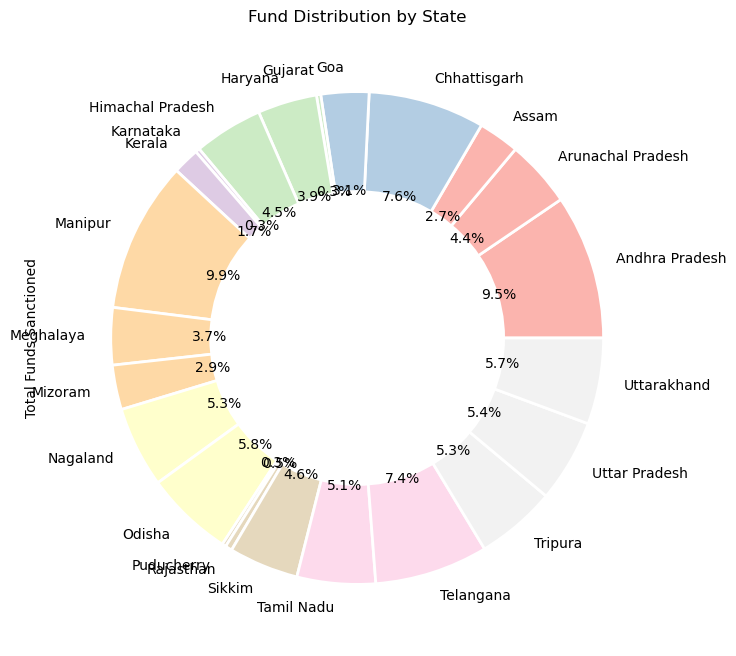

In [188]:
plt.figure(figsize=(8, 8))
df.groupby("State Women Commission")["Total Funds Sanctioned"].sum().plot.pie(autopct="%1.1f%%", cmap="Pastel1", wedgeprops={"linewidth": 2, "edgecolor": "white"})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white"))
plt.title("Fund Distribution by State")
plt.show()

Creates a donut chart showing the percentage distribution of total funds sanctioned by each state.

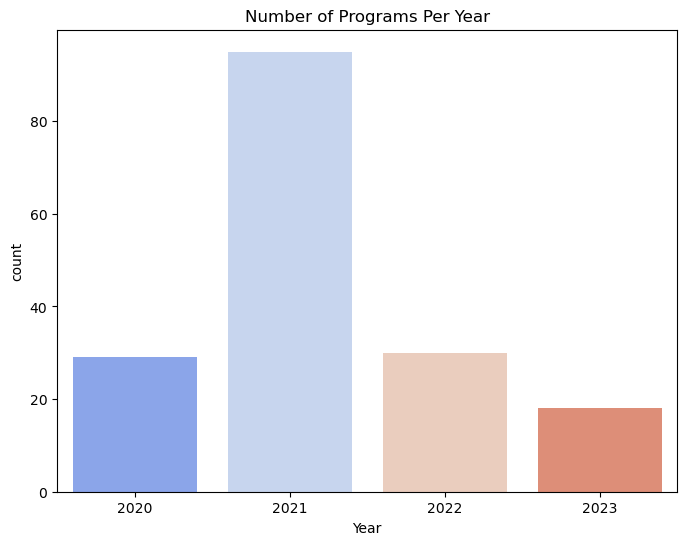

In [191]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Year", data=df, palette="coolwarm")
plt.title("Number of Programs Per Year")
plt.show()

Creates a bar chart showing the number of programs conducted each year.

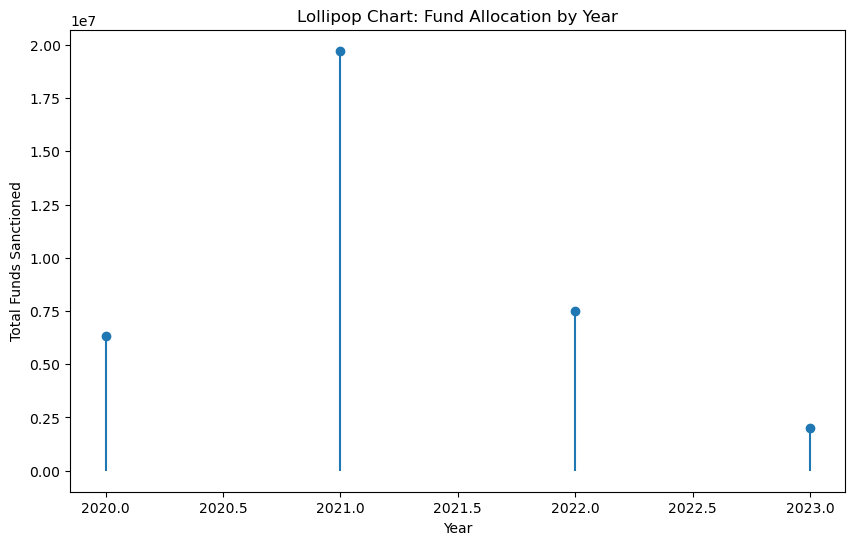

In [194]:
df_grouped = df.groupby("Year")["Total Funds Sanctioned"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.stem(df_grouped["Year"], df_grouped["Total Funds Sanctioned"], basefmt=" ")
plt.xlabel("Year")
plt.ylabel("Total Funds Sanctioned")
plt.title("Lollipop Chart: Fund Allocation by Year")
plt.show()

Creates a lollipop chart to visualize the total funds sanctioned per year.

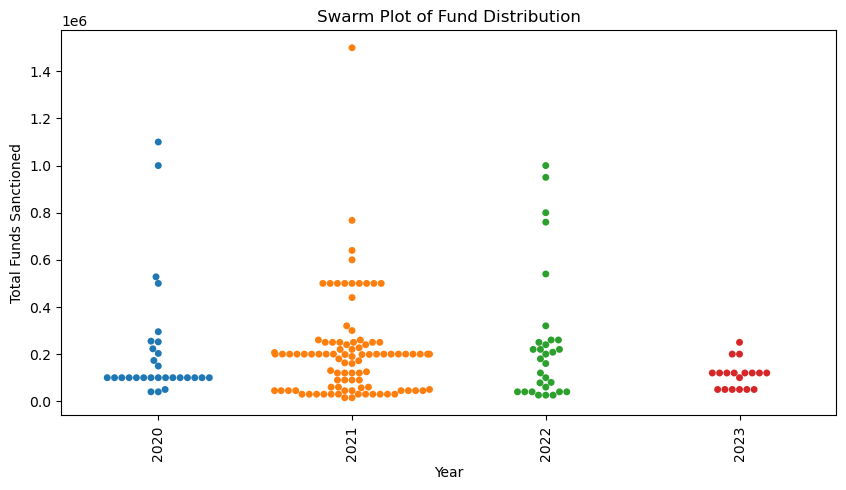

In [197]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x=df["Year"], y=df["Total Funds Sanctioned"])
plt.xlabel("Year")
plt.ylabel("Total Funds Sanctioned")
plt.title("Swarm Plot of Fund Distribution")
plt.xticks(rotation=90)
plt.show()

Creates a swarm plot to visualize the distribution of total funds sanctioned across different years.

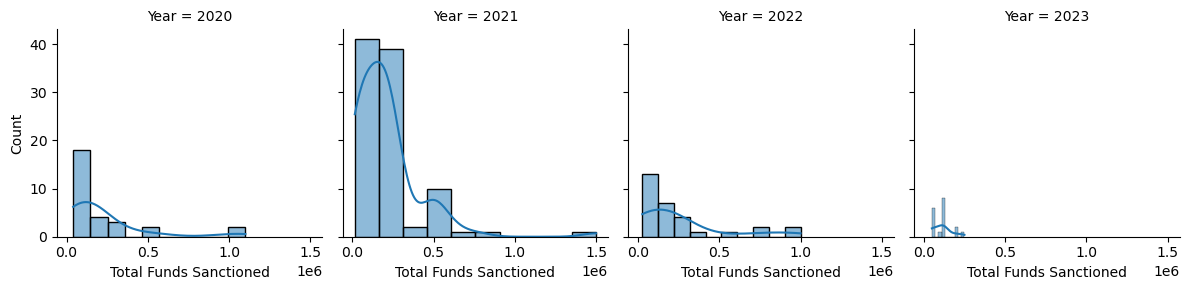

In [200]:
g = sns.FacetGrid(df, col="Year", col_wrap=4, height=3)
g.map_dataframe(sns.histplot, x="Total Funds Sanctioned", bins=10, kde=True)
plt.show()

Creates a grid of histograms, each representing the distribution of total funds sanctioned for a specific year.

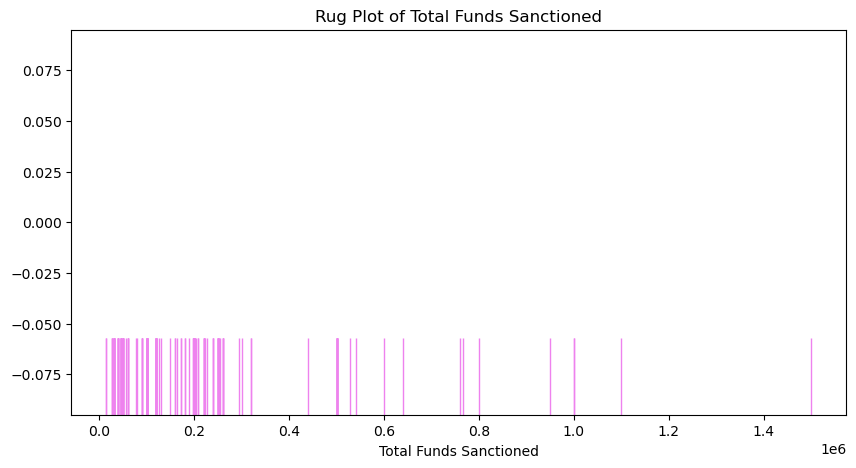

In [203]:
plt.figure(figsize=(10, 5))
sns.rugplot(df["Total Funds Sanctioned"], height=0.2, color="violet")
plt.xlabel("Total Funds Sanctioned")
plt.title("Rug Plot of Total Funds Sanctioned")
plt.show()

Creates a rug plot displaying individual data points along the x-axis to show the distribution of total funds sanctioned.

**Final Observation**

**1. Structure & Data Types:**<br>
  The dataset contains 173 rows and 5 columns:
   </br>
   --Sl. No. (float): Appears to be an index with decimal values.
   <br>
   --Year (object): Represents the financial year (e.g., "2020-21").
   </br>
   --State Women Commission (object): The state that received funding.
   <br>
   --Name of the Program (object): The specific initiative funded.
   </br>
   --Total Funds Sanctioned (object): The allocated funds (but stored as a string, needs conversion to numeric).